Step1: Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import fft,dct
from itertools import product
from PIL import Image

Step2: Read the stego image

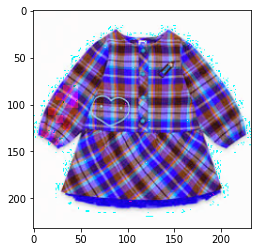

In [2]:
stego_img=cv2.imread("stego_img.png")
plt.imshow(stego_img)

Step3: Split the image into RGB

In [3]:
newbimg=stego_img[:,:,0]
newgimg=stego_img[:,:,1]
newrimg=stego_img[:,:,2]

Step4: Find the height, width and no.of blocks

In [4]:
messSize=None
secretlist=[]
newbimg=np.float32(newbimg)
height,width,channel=stego_img.shape
#find the number of row and column blocks
new_x_blocks=width//8
new_y_blocks=height//8
quantisedct=np.zeros((newbimg.shape),np.uint8)      

Step5: Initialise and declare the quantisation matrix

In [5]:
quant = np.array([[16,11,10,16,24,40,51,61],
                 [12,12,14,19,26,58,60,55],
                 [14,13,16,24,40,57,69,56],
                 [14,17,22,29,51,87,80,62],                    
                 [18,22,37,56,68,109,103,77],
                 [24,35,55,64,81,104,113,92],
                 [49,64,78,87,103,121,120,101],
                 [72,92,95,98,112,100,103,99]])

Step6: Define function to convert decimal to binary

In [6]:
def binary_value(val):
    binval = bin(val)[2:]
    while len(binval) < 8:
        binval = "0"+binval
    return binval

Step7: Apply DCT to find the hidden message in binary

In [7]:
for x in range(0,new_x_blocks):
    for y in range(0,new_y_blocks):
        newx_offset=x*8
        newy_offset=y*8
        newx_end=newx_offset+8
        newy_end=newy_offset+8
        newimgblocks=newbimg[newy_offset:newy_end,newx_offset:newx_end]-128#break the stego image into 8×8 block of pixels and subtract 128
        quantisedct=(cv2.dct(newimgblocks))#apply DCT to each block
        newdctblocks=np.round(cv2.dct(newimgblocks))
        for i in range(0,8):
             for j in range(0,8):
                quantisedct[i][j]=(np.round(newdctblocks[i][j]/quant[i][j]))#compress each block through quantization table 
        newquantisedblock=quantisedct
        newdc=newquantisedblock[0][0]#find the value of the first pixel and convert it to decimal
        newdc_list=[]
        n=(int(newdc))
        if n>=0:
            newdc=bin(n)[2:].rjust(8,'0')
        if n<0:
            n=abs(n)
            bin1=binary_value(n)
            newdc="1"+bin1[1:8]
        newdc=str(newdc)
        #print(newdc)
      
        for i in newdc:
            newdc_list.append(i)
        a = ''.join(map(str, newdc_list))
     
        secret_element=a[7]#find the LSB
        #print(a)
       
        
        secretlist.append(secret_element)#append LSB to list

Step8: Insert the message from binary code

In [8]:
myarray=np.array(secretlist)
b=[]

In [9]:
index=0
b=[]
k=''
def binToDec(binNum):
    decNum = 0
    power = 0
    while binNum>0:
        decNum += 2 **power* (binNum%10)
        binNum //=10
        power += 1
    return decNum

In [10]:
k=''
for i in secretlist:
    k=k+i
    index+=1
    if index%8==0:
        b.append(k)
        k=''
#print(b) 
message_list=[]
for i in b:
    k=int(i)
    k=binToDec(k)
    message_list.append(chr(k))

In [11]:
length_message=""
for i in message_list:
    if i==" ":
        break
    elif i>='0' and i<='9':
        length_message=length_message+i
print(length_message)

20


In [12]:
secret_message=""
start=len(length_message)+1
#end=len(length_message)+int((length_message))
for i in range(len(length_message)+1,len(length_message)+(int(length_message))-2):
    secret_message=secret_message+message_list[i]
print(secret_message)

This is wonderful


In [13]:
f = open("secret_message.txt", "w")
f.write(secret_message)
f.close()